# BioImage Model Zoo Example notebook

This notebook shows how to interact with the `bioimgaeio.spec` programmatically to explore, load and export content from the [BioImage Model Zoo](https://bioimage.io).

## 0. Activate human readable output error messages

In [117]:
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

enable_pretty_validation_errors_in_ipynb()

# Load dependencies
from pathlib import Path
from ruyaml import YAML
import pooch
import json
import matplotlib.pyplot as plt
from imageio.v3 import imread
from bioimageio.spec.utils import download
from bioimageio.spec.model.v0_5 import ArchitectureFromFileDescr
from bioimageio.spec.utils import download
from bioimageio.spec import InvalidDescr, load_description
from bioimageio.spec.common import HttpUrl
from bioimageio.spec.model import ModelDescr

## 1. Inspect the available models in the BioImage Model Zoo

In [13]:
yaml = YAML(typ="safe")

COLLECTION_URL = "https://raw.githubusercontent.com/bioimage-io/collection-bioimage-io/gh-pages/collection.json"

collection_path = Path(pooch.retrieve(COLLECTION_URL, known_hash=None))

with collection_path.open() as f:

    collection = json.load(f)

model_urls = [entry["rdf_source"] for entry in collection["collection"] if entry["type"] == "model"]
model_rdfs = [yaml.load(Path(pooch.retrieve(mu, known_hash=None))) for mu in model_urls]

print("All models checked.")

# nickname_list = []
print('List of models in BioImageIO:\n')
for model in model_rdfs:
    # nickname_list.append(model['config']['bioimageio']['nickname'])
    print(f"{model['name']}\n - {model['config']['bioimageio']['nickname']}\n - {model['config']['bioimageio']['doi']}")


All models checked.
List of models in BioImageIO:

NucleiSegmentationBoundaryModel
 - affable-shark
 - 10.5281/zenodo.6647674
StarDist H&E Nuclei Segmentation
 - chatty-frog
 - 10.5281/zenodo.6338615
LiveCellSegmentationBoundaryModel
 - hiding-tiger
 - 10.5281/zenodo.6647688
Neuron Segmentation in EM (Membrane Prediction)
 - impartial-shrimp
 - 10.5281/zenodo.5874742
Pancreatic Phase Contrast Cell Segmentation (U-Net)
 - discreet-rooster
 - 10.5281/zenodo.8186255
EnhancerMitochondriaEM2D
 - hiding-blowfish
 - 10.5281/zenodo.6811922
MitochondriaEMSegmentationBoundaryModel
 - kind-seashell
 - 10.5281/zenodo.6630266
Cell Segmentation from Membrane Staining for Plant Tissues
 - humorous-owl
 - 10.5281/zenodo.5888237
PlatynereisEMnucleiSegmentationBoundaryModel
 - organized-badger
 - 10.5281/zenodo.6028098
StarDist Fluorescence Nuclei Segmentation
 - fearless-crab
 - 10.5281/zenodo.6348085
B. Sutilist bacteria segmentation - Widefield microscopy - 2D UNet
 - placid-llama
 - 10.5281/zenodo.7

## 2. Load and inspect a model description

To load a model of your choice, you only need to write one of the following ones in the cell and leave the rest empty.

**`BMZ_MODEL_ID`**: Unique identifier of the model to load in the BioImage Model Zoo, e.g., impartial-shrimp. These identifiers are given on each model card in the zoo.

OR

**`BMZ_MODEL_URL`**: URL to the main Zenodo repository as well as to the rdf.yaml file containing the resource description specifications can be used to load models as well.

In [124]:
# Load the model description with one of these options
BMZ_MODEL_ID = "affable-shark"
BMZ_MODEL_URL = ""

if BMZ_MODEL_ID != "":
    url = BMZ_MODEL_ID
elif BMZ_MODEL_URL != "":
    url = BMZ_MODEL_URL
else:
    print('Please specify a model ID, DOI or URL')

loaded_descr = load_description(url, format_version="latest")
if isinstance(loaded_descr, InvalidDescr):
    loaded_descr.validation_summary.display()
    raise ValueError(f"Failed to load {example_model_id}")
elif not isinstance(loaded_descr, ModelDescr):
    raise ValueError("This notebook expects a model description")
else:
    model = loaded_descr

if BMZ_MODEL_ID != "":
    print(f"The model '{model.name}' with ID '{BMZ_MODEL_ID}' has been correctly loaded. This model has version {model.format_version}.")
elif BMZ_MODEL_URL != "":
    print(f"The model '{model.name}' with URL '{BMZ_MODEL_URL}' has been correctly loaded. This model has version {model.format_version}.")
else:
    print("Please specify a model ID, DOI or URL")
example_model_id = model.id

2024-05-07 16:42:53.939 | INFO     | bioimageio.spec._internal.io_utils:open_bioimageio_yaml:116 - 🦈 loading affable-shark 1 from https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1/files/bioimageio.yaml
/Users/esti/mambaforge/envs/biospec/lib/python3.10/site-packages/bioimageio/spec/model/v0_5.py:1363: UserWarning: Conversion of channel size from an implicit output shape may by wrong
  warnings.warn(


The model 'NucleiSegmentationBoundaryModel' with ID 'affable-shark' has been correctly loaded. This model has version 0.5.0.


## 3. Validation summary of the model
The model specifications can be validated for correctness. By running `model.validation_summary.display()`, the BioImage Model Zoo format is checked (static validation). This validation is also performed when a model is uploaded to the zoo.

Here is a description of the outputs you can get:
- `package version`: The version of the `bioimageio.spec` library used to run the validation.
- ✔️: Validation passes.
- ⚠: Warning messages to bring attention on the lack of useful documentation or recommendations from the BioImageIO developers. 
- **X**: Validation does not pass.



In [20]:
model.validation_summary.display()

✔️ bioimageio validation: passed

source: https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1/files/bioimageio.yaml
|     package     |  version   |
|       ---       |    ---     |
| bioimageio.spec | 0.5.2post3 |


|  ❓  |                  location                 |                                                                       detail                                                                       |
| --- |                    ---                    |                                                                        ---                                                                         |
| ✔️  |                                           | initialized model 0.4.10                                                                                                                           |
| ✔️  |                                           | bioimageio.spec format validation model 0.4.10                                                                                                     |
| ⚠   | `weights.pytorch_state_dict.dependencies` | Custom dependencies (conda:environment.yaml) specified. Avoid this whenever possible to allow execution in a wider range of software environments. |
|     |                                           |                                                                                                                                                    |
| ✔️  |                                           | initialized model 0.5.0                                                                                                                            |
| ✔️  |                                           | bioimageio.spec format validation model 0.5.0                                                                                                      |
| ⚠   | `documentation`                           | No '# Validation' (sub)section found in documentation.md.                                                                                          |
|     |                                           |                                                                                                                                                    |


## 4. Inspect the content of the model specifications

The model 'NucleiSegmentationBoundaryModel' had the following properties and metadata

 Description Nucleus segmentation for fluorescence microscopy

 The authors of the model are [Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user=None)]
 and it is maintained by: [Maintainer(affiliation=None, email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]
 License: CC-BY-4.0

 If you use this model, you are expected to cite [CiteEntry(text='training library', doi=None, url='https://doi.org/10.5281/zenodo.5108853'), CiteEntry(text='architecture', doi=None, url='https://doi.org/10.1007/978-3-319-24574-4_28'), CiteEntry(text='segmentation algorithm', doi=None, url='https://doi.org/10.1038/nmeth.4151'), CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')]

 Further documentation can be found here: [CiteEntry(text='training library', doi=None, url='https://doi.org/10.5281/zenodo.5108853'), C

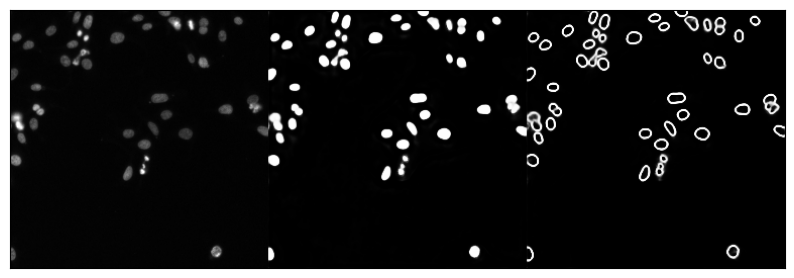

In [28]:
print(f"The model '{model.name}' had the following properties and metadata")
print()
print(f" Description {model.description}")
print()
print(f" The authors of the model are {model.authors}")
print(f" and it is maintained by: {model.maintainers}")
print(f" License: {model.license}")
print()

print(f" If you use this model, you are expected to cite {model.cite}")
print()
print(f" Further documentation can be found here: {model.cite}")
print()
print(f" GitHub repository: {model.git_repo}")
print()
print(f"Covers of the model '{model.name}'")

for cover in model.covers:
    cover_data = imread(download(cover).path)
    plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)
    plt.xticks([])
    plt.yticks([])
    plt.show()

### 4.1 Inspect the weights, expected inputs and outputs, and model architecture

In [120]:
print("Available weight formats for this model:")
print("----------------------------------------")
if model.weights.keras_hdf5 is not None:
    print("Keras HDF5")
    keras_weights_src = model.weights.keras_hdf5.download().path
    print(f"The model weights are stored in {keras_weights_src}.")
    print()
    print(model.weights.keras_hdf5)
    print()
if model.weights.pytorch_state_dict is not None:
    print("PyTorch state dict")
    pytorch_state_dict_weights_src = model.weights.pytorch_state_dict.download().path
    print(f"The model weights are stored in {pytorch_state_dict_weights_src}.")
    print()
    if model.weights.pytorch_state_dict is not None:
        arch = model.weights.pytorch_state_dict.architecture
        if isinstance(arch, ArchitectureFromFileDescr):
            print(f"Model architecture given by '{arch.callable}' in {arch.source}")
            print("architecture key word arguments:")
            pprint(arch.kwargs)
            arch_file_path = download(arch.source, sha256=arch.sha256).path
            arch_file_sha256 = arch.sha256
            arch_name = arch.callable
            arch_kwargs = arch.kwargs 
    print()
    print(model.weights.pytorch_state_dict)
    print()
if model.weights.torchscript is not None:
    print("Torchscript")
    pytorch_state_dict_weights_src = model.weights.torchscript.download().path
    print(f"The model weights are stored in {pytorch_state_dict_weights_src}.")
    print()
    print(model.weights.torchscript)
    print()
if model.weights.tensorflow_js is not None:
    print("TensorFlow Java script")
    tfjs_weights_src = model.weights.keras_hdf5.download().path
    print(f"The model weights are stored in {tfjs_weights_src}.")
    print()
    print(model.weights.tensorflow_js)
    print()
if model.weights.tensorflow_saved_model_bundle is not None:
    print("TensorFlow saved model bundle")
    tf_weights_src = model.weights.keras_hdf5.download().path
    print(f"The model weights are stored in {tf_weights_src}.")
    print()
    print(model.weights.tensorflow_saved_model_bundle)
    print()
if model.weights.onnx is not None:
    print("ONNX")
    onnx_weights_src = model.weights.onnx.download().path
    print(f"The model weights are stored in {onnx_weights_src}.")
    print()
    print(model.weights.onnx)
    print()

Available weight formats for this model:
----------------------------------------
PyTorch state dict
The model weights are stored in /Users/esti/Library/Caches/bioimageio/a480e11200e5367d895a74be06adf60f-weights.pt.

Model architecture given by 'UNet2d' in unet.py
architecture key word arguments:
{'depth': 4,
 'final_activation': 'Sigmoid',
 'gain': 2,
 'in_channels': 1,
 'initial_features': 64,
 'out_channels': 2,
 'postprocessing': None,
 'return_side_outputs': False}

source=RelativePath('weights.pt') sha256='608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7' authors=None parent=None architecture=ArchitectureFromFileDescr(source=RelativePath('unet.py'), sha256='7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3', callable='UNet2d', kwargs={'depth': 4, 'final_activation': 'Sigmoid', 'gain': 2, 'in_channels': 1, 'initial_features': 64, 'out_channels': 2, 'postprocessing': None, 'return_side_outputs': False}) pytorch_version=Version(root='1.10') dependencie

In [146]:
# or what inputs the model expects
print(f"The model requires {len(model.inputs)} input(s) with the following features:")
print()
for inp in range(len(model.inputs)):
    pprint(model.inputs[inp].axes)
    test_input_path = model.inputs[inp].test_tensor.download().path
    test_input_array = np.load(test_input_path)
    print()
    print(f"Expected shape for the input image: {test_input_array.shape}")
    if len(model.inputs[inp].preprocessing)>1:
        print()
        print(f"It is expected to be processed with: ")
        for i in range(len(model.inputs[inp].preprocessing)-1):
            print(f"{model.inputs[inp].preprocessing[i]}")

print("-------------------------------------------------------------------------------")
# and what the model outputs are
print(f"The model requires {len(model.outputs)} output(s) with the following features:")
print()
for out in range(len(model.outputs)):
    pprint(model.outputs[out].axes)
    test_output_path = model.outputs[out].test_tensor.download().path
    test_output_array = np.load(test_output_path)
    print()
    print(f"Expected shape for the input image: {test_output_array.shape}")

    if len(model.outputs[out].postprocessing)>1:
        print()
        print(f"It is expected to be postprocessed with: ")
        for i in range(len(model.outputs[out].postprocessing)-1):
            print(f"{model.outputs[out].postprocessing[i]}")

The model requires 1 input(s) with the following features:

[BatchAxis(id='batch', description='', type='batch', size=None),
 ChannelAxis(id='channel', description='', type='channel', channel_names=['channel0']),
 SpaceInputAxis(size=ParameterizedSize(min=64, step=16), id='y', description='', type='space', unit=None, scale=1.0, concatenable=False),
 SpaceInputAxis(size=ParameterizedSize(min=64, step=16), id='x', description='', type='space', unit=None, scale=1.0, concatenable=False)]

Expected shape for the input image: (1, 1, 256, 256)

It is expected to be processed with: 
id='ensure_dtype' kwargs=EnsureDtypeKwargs(dtype='uint8')
id='zero_mean_unit_variance' kwargs=ZeroMeanUnitVarianceKwargs(axes=['channel', 'y', 'x'], eps=1e-06)
-------------------------------------------------------------------------------
The model requires 1 output(s) with the following features:

[BatchAxis(id='batch', description='', type='batch', size=None),
 ChannelAxis(id='channel', description='', type='cha

## 5. Create a model description

Let's recreate a model based on parts of the loaded model description from above!

Creating a model description in Python means creating a `ModelDescr` object compatible with the BioImnageIO Model Spec. This allows sharing the model via the BioImage Model Zoo or deploy it in the community partner software.


Without any input data, the class `ModelDescr` will raise a `ValidationError` listing missing required fields:

In [152]:
from bioimageio.spec.common import ValidationError
from bioimageio.spec.model.v0_5 import ModelDescr

try:
    my_model_descr = ModelDescr()  # type: ignore
except ValidationError as e:
    print(e)

9 validation errors for bioimage.io model specification
name
  Field required [type=missing, input_value={'format_version': '0.5.0', 'type': 'model'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
description
  Field required [type=missing, input_value={'format_version': '0.5.0', 'type': 'model'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
authors
  Field required [type=missing, input_value={'format_version': '0.5.0', 'type': 'model'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
cite
  Field required [type=missing, input_value={'format_version': '0.5.0', 'type': 'model'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/missing
license
  Field required [type=missing, input_value={'format_version': '0.5.0', 'type': 'model'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v

To populate a `ModelDescr` appropriately we need to create the required subparts. This is part of the model metadata needed to document the model and ensure its correct deployment.

### 5.1 Inputs:

In [175]:
from bioimageio.spec.model.v0_5 import (
    Author,
    AxisId,
    BatchAxis,
    ChannelAxis,
    CiteEntry,
    Doi,
    FileDescr,
    Identifier,
    InputTensorDescr,
    IntervalOrRatioDataDescr,
    ModelDescr,
    OutputTensorDescr,
    ParameterizedSize,
    PytorchStateDictWeightsDescr,
    SizeReference,
    SpaceInputAxis,
    SpaceOutputAxis,
    TensorId,
    TorchscriptWeightsDescr,
    WeightsDescr,
)

input_axes = [
    BatchAxis(),
    ChannelAxis(channel_names=[Identifier("raw")])]
if len(model.inputs[0].axes)==5: #example_model_id == "impartial-shrimp":
    input_axes += [
        SpaceInputAxis(id=AxisId("z"), size=ParameterizedSize(min=16, step=8)),
        SpaceInputAxis(id=AxisId('y'), size=ParameterizedSize(min=144, step=72)),
        SpaceInputAxis(id=AxisId('x'), size=ParameterizedSize(min=144, step=72)),
    ]
    data_descr = IntervalOrRatioDataDescr(type=model.inputs[0].data.type)
elif len(model.inputs[0].axes)==4: #example_model_id == "pioneering-rhino":
    input_axes += [
        SpaceInputAxis(id=AxisId('y'), size=ParameterizedSize(min=256, step=8)),
        SpaceInputAxis(id=AxisId('x'), size=ParameterizedSize(min=256, step=8)),
    ]
    data_descr = IntervalOrRatioDataDescr(type=model.inputs[0].data.type)
else:
    raise NotImplementedError(f"Recreating inputs for {example_model_id} is not implemented")
    
test_input_path = model.inputs[inp].test_tensor.download().path
input_descr = InputTensorDescr(id=TensorId("raw"), axes=input_axes, test_tensor=FileDescr(source=test_input_path), data=data_descr)
print("Input description loaded")

Input description loaded


### 5.2 Outputs

In [187]:
output_axes = [
    BatchAxis(),
    ChannelAxis(channel_names=[Identifier(n) for n in model.outputs[0].axes[1].channel_names])]
if len(model.outputs[0].axes) == 5: #example_model_id == "impartial-shrimp":
    output_axes += [
        SpaceOutputAxis(id=AxisId("z"), size=ParameterizedSize(min=16, step=8)),  # implicitly same size as raw.z as it is parametrized the same.
        SpaceOutputAxis(id=AxisId('y'), size=ParameterizedSize(min=144, step=72)),
        SpaceOutputAxis(id=AxisId('x'), size=ParameterizedSize(min=144, step=72))
    ]
elif len(model.outputs[0].axes) == 4: #example_model_id == "pioneering-rhino":
    output_axes += [
        SpaceOutputAxis(id=AxisId("y"), size=SizeReference(tensor_id=TensorId('raw'), axis_id=AxisId('y'))),  # explicitly same size as raw.y
        SpaceOutputAxis(id=AxisId("x"), size=SizeReference(tensor_id=TensorId('raw'), axis_id=AxisId('x'))),
    ]
else:
    raise NotImplementedError(f"Recreating outputs for {example_model_id} is not implemented")
    
test_output_path = model.outputs[0].test_tensor.download().path
output_descr = OutputTensorDescr(id=TensorId("prob"), axes=output_axes, test_tensor=FileDescr(source=test_output_path))
print("Output description loaded")

Output description loaded


### 5.3 Model architecture
PyTorch state dict type of weights need to come with the corresponding architecture (e.g., 2D-U-Net):

In [188]:
from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    ArchitectureFromLibraryDescr,
    Version,
)

try:
    import torch
except ImportError:
    pytorch_version = Version("1.15")
else:
    pytorch_version = Version(torch.__version__)

## Recover the architecture information from the original model
if model.weights.pytorch_state_dict is not None:
    arch = model.weights.pytorch_state_dict.architecture
    if isinstance(arch, ArchitectureFromFileDescr):
        arch_file_path = download(arch.source, sha256=arch.sha256).path
        arch_file_sha256 = arch.sha256
        arch_name = arch.callable
        arch_kwargs = arch.kwargs 


pytorch_architecture = ArchitectureFromFileDescr(
    source=arch_file_path,
    sha256=arch_file_sha256,
    callable=arch_name,
    kwargs=arch_kwargs
)
# A model architecture published as a package may also be referenced
# Make sure to include the library referenced in `import_from` in the `depdendencies`
my_unused_arch = ArchitectureFromLibraryDescr(callable=Identifier("MyModel"), import_from="my_library.subpackage")


### 5.4 Create the model

In [209]:
from bioimageio.spec.model.v0_5 import LicenseId

my_model_descr = ModelDescr(
    name="My cool model",
    description="A test model for demonstration purposes only",
    authors=[Author(name="me", affiliation="my institute", github_user="bioimageiobot")],  # change github_user to your GitHub account name
    cite=[CiteEntry(text="for model training see my paper", doi=Doi("10.1234something"))],
    license=LicenseId("MIT"),
    documentation=HttpUrl("https://raw.githubusercontent.com/bioimage-io/spec-bioimage-io/main/README.md"),
    git_repo=HttpUrl("https://github.com/bioimage-io/spec-bioimage-io"),  # change to repo where your model is developed
    inputs=[input_descr],
    outputs=[output_descr],
    #covers = [download(model.covers[0]).path],
    weights=WeightsDescr(
        pytorch_state_dict=PytorchStateDictWeightsDescr(
            source=pytorch_state_dict_weights_src,
            architecture=pytorch_architecture,
            pytorch_version=pytorch_version
        ),
        torchscript=TorchscriptWeightsDescr(
            source=torchscript_weights_src,
            pytorch_version=pytorch_version,
            parent="pytorch_state_dict", # these weights were converted from the pytorch_state_dict weights ones.
        ),
    ),
    )
print("created '{my_model_descr.name}'")


2024-05-07 17:17:47.661 | Level 30 | bioimageio.spec._internal.field_warning:issue_warning:149 - documentation: No '# Validation' (sub)section found in https://raw.githubusercontent.com/bioimage-io/spec-bioimage-io/main/README.md.
2024-05-07 17:17:47.673 | Level 30 | bioimageio.spec._internal.field_warning:issue_warning:149 - covers: Failed to generate cover image(s): Failed to construct cover image from shape (1, 2, 256, 256)


created '{my_model_descr.name}'


### 5.5. Covers
Some optional fields were filed with default values,e.g., `covers`, as we did not specify them. When possible, default visualization of the test inputs and test outputs was used. When the input or the output have more than one channel, the covers are empty and need to be generated and included.

To reuse the cover from the previous model, one can raun the following code to get the path to it:
```python
from bioimageio.spec.utils import download

cover_path = download(model.covers[0]).path
```

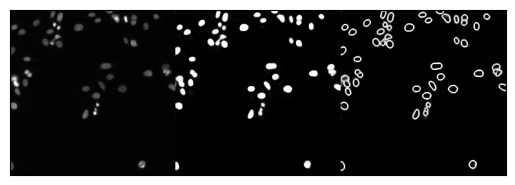

In [208]:
for cover in my_model_descr.covers:
    plt.imshow(imread(cover))
    plt.xticks([])
    plt.yticks([])
    plt.show()

## 6. Test the recently exported model
### 6.1 Static validation
(Same validation as at the very beginning)

In [213]:
model.validation_summary.display()

✔️ bioimageio validation: passed

source: https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1/files/bioimageio.yaml
|     package     |  version   |
|       ---       |    ---     |
| bioimageio.spec | 0.5.2post3 |


|  ❓  |                  location                 |                                                                       detail                                                                       |
| --- |                    ---                    |                                                                        ---                                                                         |
| ✔️  |                                           | initialized model 0.4.10                                                                                                                           |
| ✔️  |                                           | bioimageio.spec format validation model 0.4.10                                                                                                     |
| ⚠   | `weights.pytorch_state_dict.dependencies` | Custom dependencies (conda:environment.yaml) specified. Avoid this whenever possible to allow execution in a wider range of software environments. |
|     |                                           |                                                                                                                                                    |
| ✔️  |                                           | initialized model 0.5.0                                                                                                                            |
| ✔️  |                                           | bioimageio.spec format validation model 0.5.0                                                                                                      |
| ⚠   | `documentation`                           | No '# Validation' (sub)section found in documentation.md.                                                                                          |
|     |                                           |                                                                                                                                                    |


### 6.2 Dynamic validation

If you have the `bioimageio.core` library installed, you can run the dynamic validation and test if the model is correct and properly producing the test output image from the test input image. 
Otherwise, skip this cell.

In [ ]:
from bioimageio.core import test_model
summary = test_model(my_model_descr)
summary.display()

## 7. Package your model

A model is more than it's YAML description file! We refer to a zip-file containing all files relevant to a model as a model package. 

In [214]:
from pathlib import Path

from bioimageio.spec import save_bioimageio_package

print("package path:", save_bioimageio_package(my_model_descr, output_path=Path('my_model.zip')))

package path: my_model.zip
